In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
#calculating  mean of numerical column 
mean=df.price_per_sqft.mean()
mean

7920.336742424242

In [6]:
#Median
median = df.price_per_sqft.median()
median

5438.0

### 1. Detecting and removing the outliers using mean function

In [7]:
#setting the threshold as 3 times standard deviation
std=df.price_per_sqft.std()
std

106727.16032810867

In [8]:
Threshold= 3*std
Threshold

320181.480984326

In [9]:
#detecting the outliers
outliers=df.loc[(df['price_per_sqft']>Threshold)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [10]:
#removing the outliers
df_without_outliers=df.loc[df['price_per_sqft']<=Threshold]
print('Data without outliers:',df_without_outliers)

Data without outliers:                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1   

C:\Users\naufg\AppData\Local\Temp\ipykernel_15656\2284377812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_without_outliers['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

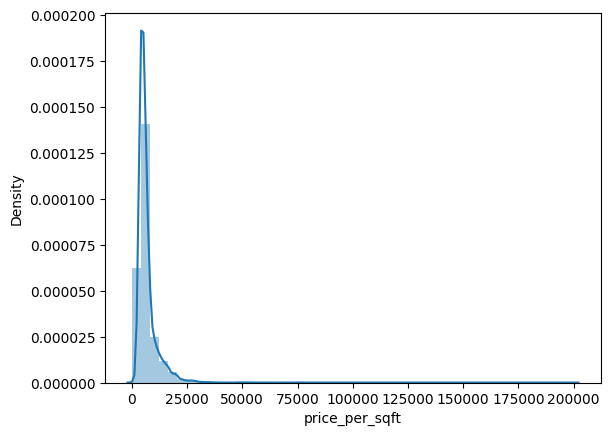

In [11]:
sns.distplot(df_without_outliers['price_per_sqft'])

#### There is a significant difference between the mean and median . Indicating the presence of Outliers



#### Detecting and removing  Outliers 

#### 2. Normal distribution method


In [12]:
#plotting the distribution

C:\Users\naufg\AppData\Local\Temp\ipykernel_15656\2383957923.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'], hist=True, kde=True, bins=30, color='blue', hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})


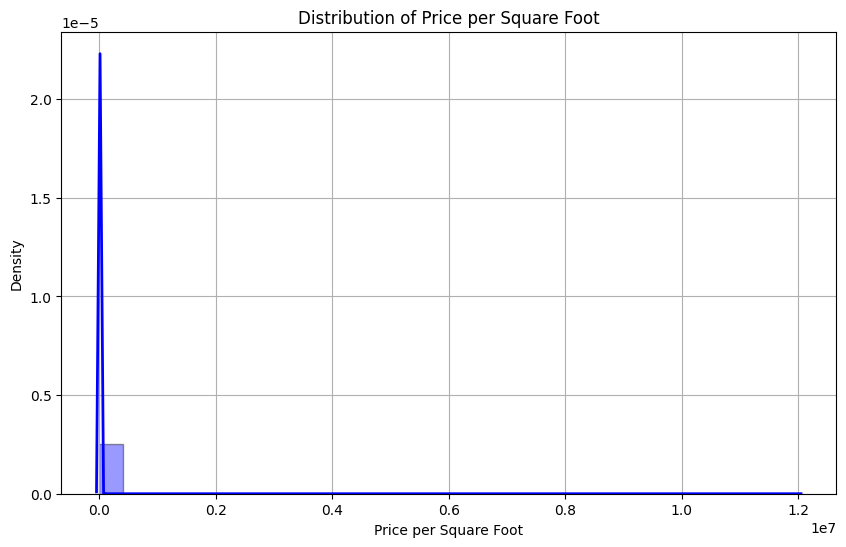

In [13]:
# Plot the distribution of price_per_sqft
plt.figure(figsize=(10, 6))
sns.distplot(df['price_per_sqft'], hist=True, kde=True, bins=30, color='blue', hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Density')
plt.grid(True)
plt.show()

As we can see here it is left skewed , it is definitely containing the outliers

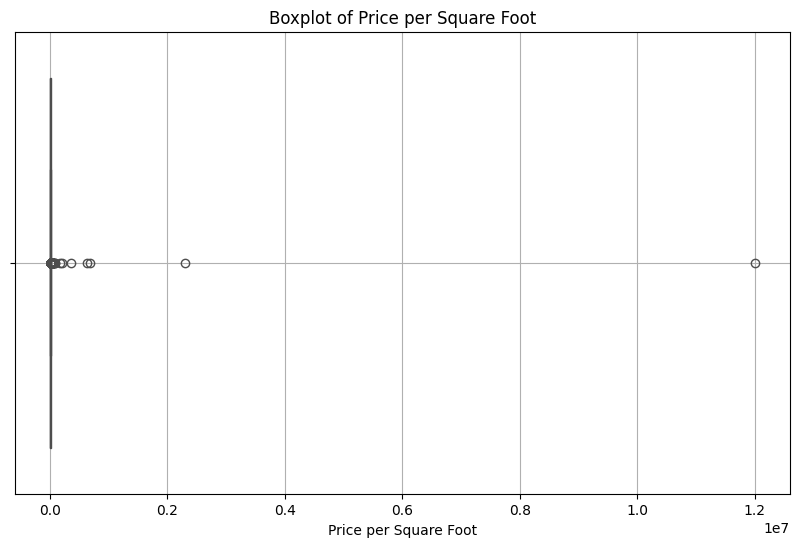

In [14]:
#to see the outliers
# Plot the boxplot of price_per_sqft
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_per_sqft'], color='blue')
plt.title('Boxplot of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.grid(True)
plt.show()

Here we can see the outliers

In [15]:
print('mean:',mean)
print('Standard Deviation:',std)

mean: 7920.336742424242
Standard Deviation: 106727.16032810867


In [43]:
#setting a threshold
threshold_price_per_sqft=3
Outliers=df['price_per_sqft'][np.abs(df['price_per_sqft'] - mean) > threshold_price_per_sqft * std]
print("Detected outliers in price per square feet:", outliers)


Detected outliers in price per square feet:              location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333


In [45]:
#Removing the outliers
cleaned_price_per_sqft_df = df['price_per_sqft'][np.abs(df['price_per_sqft'] - mean) <= threshold_price_per_sqft * std]
print("df without outliers", cleaned_price_per_sqft_df)

df without outliers 0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13195, dtype: int64


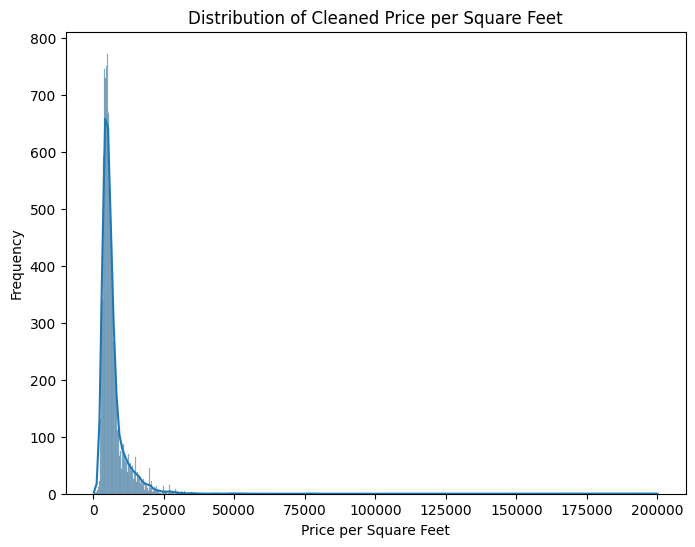

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_price_per_sqft_df, kde=True)
plt.title('Distribution of Cleaned Price per Square Feet')
plt.xlabel('Price per Square Feet')
plt.ylabel('Frequency')
plt.show()

### 3.Z score method

In [16]:
upper_limit=df['price_per_sqft'].mean()+3*df['price_per_sqft'].std()
lower_limit=df['price_per_sqft'].mean()-3*df['price_per_sqft'].std()
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 328101.8177267502
lower_limit: -312261.14424190175


Here these are the limit in which above and below values will be the outliers

In [17]:
#find the outliers
df.loc[(df['price_per_sqft']>upper_limit)|(df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


above are the outliers , there are two methods to remove the outliers 1.trimming  2.Capping

In [18]:
#Trimming - deleting the outlier data
new_df=df.loc[(df['price_per_sqft']<upper_limit)&(df['price_per_sqft']>lower_limit)]
print('Before removing outliers:',len(df))
print('After removing outliers:',len(new_df))   
print('Outliers:',len(df)-len(new_df))

Before removing outliers: 13200
After removing outliers: 13195
Outliers: 5


From above it is clear that we have 5 outliers

<Axes: ylabel='price_per_sqft'>

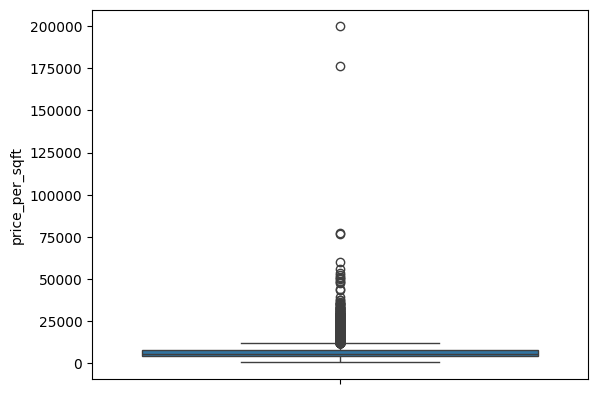

In [19]:
sns.boxplot(new_df['price_per_sqft'])

In [20]:
#Capping - Change the outliers to upper or lower limit values
new_df=df.copy() #copying a new data
new_df.loc[new_df['price_per_sqft']>upper_limit,'price_per_sqft']=upper_limit
new_df.loc[new_df['price_per_sqft']<lower_limit,'price_per_sqft']=lower_limit


C:\Users\naufg\AppData\Local\Temp\ipykernel_15656\3414839800.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '328101.8177267502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[new_df['price_per_sqft']>upper_limit,'price_per_sqft']=upper_limit


<Axes: ylabel='price_per_sqft'>

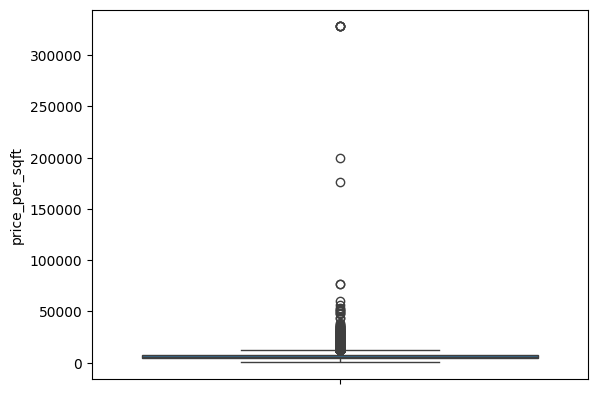

In [21]:
sns.boxplot(new_df['price_per_sqft'])

In [22]:
len(new_df) #here we capped the outliers instead of trimming

13200

### 4.IQR Method

In [23]:
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
print('q1:',q1)
print('q3:',q3)
IQR=q3-q1
print('IQR:',IQR)

q1: 4267.0
q3: 7317.0
IQR: 3050.0


In [24]:
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

(-308.0, 11892.0)

The values that are not in the range can be considered as outliers

<Axes: ylabel='price_per_sqft'>

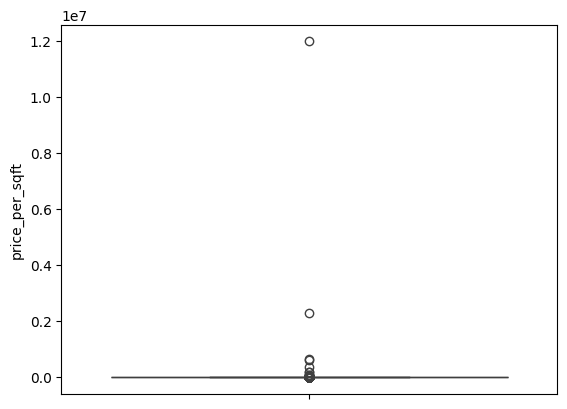

In [25]:
sns.boxplot(df['price_per_sqft'])

In [26]:
df.loc[(df['price_per_sqft']>upper_limit)|(df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [27]:
#Trimming
new_df1=df.loc[(df['price_per_sqft']<upper_limit)&(df['price_per_sqft']>lower_limit)]
print('Before removing outliers:',len(df))
print('After removing outliers:',len(new_df1))   
print('Outliers:',len(df)-len(new_df1))

Before removing outliers: 13200
After removing outliers: 11935
Outliers: 1265


From above it is clear that we have 5 outliers

C:\Users\naufg\AppData\Local\Temp\ipykernel_15656\3463964166.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df1['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

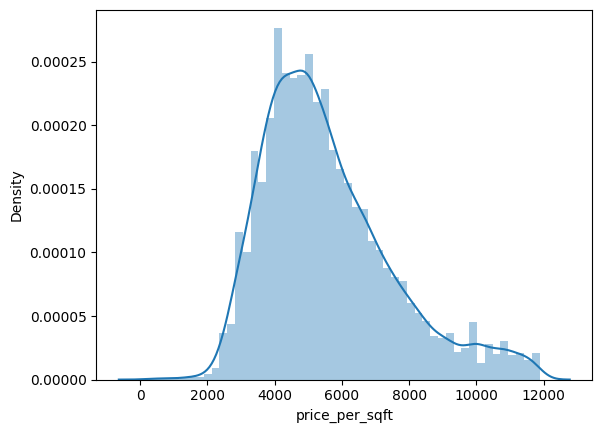

In [28]:
#plotting
sns.distplot(new_df1['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

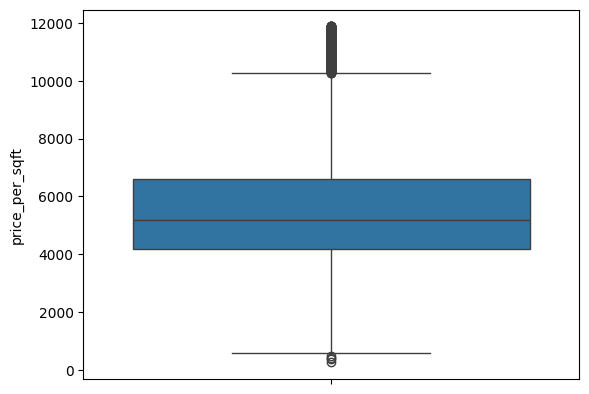

In [29]:
sns.boxplot(new_df1['price_per_sqft'])

Here we can see the outliers are removed much than the Z score method

In [30]:
#Capping
new_df1=df.copy() #copying a new data
new_df1.loc[new_df1['price_per_sqft']>upper_limit,'price_per_sqft']=upper_limit
new_df1.loc[new_df1['price_per_sqft']<lower_limit,'price_per_sqft']=lower_limit

<Axes: ylabel='price_per_sqft'>

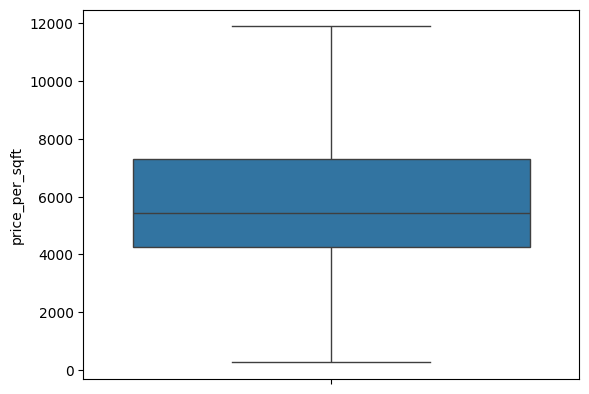

In [31]:
sns.boxplot(new_df1['price_per_sqft'])

Here the outliers are completely removed

### 5. Percentile Method

In [32]:
upper_limit=df['price_per_sqft'].quantile(0.95)
lower_limit=df['price_per_sqft'].quantile(0.05)
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 15312.099999999984
lower_limit: 3107.8500000000004


In [33]:
#detecting the outliers
df.loc[(df['price_per_sqft']>upper_limit)|(df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


C:\Users\naufg\AppData\Local\Temp\ipykernel_15656\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

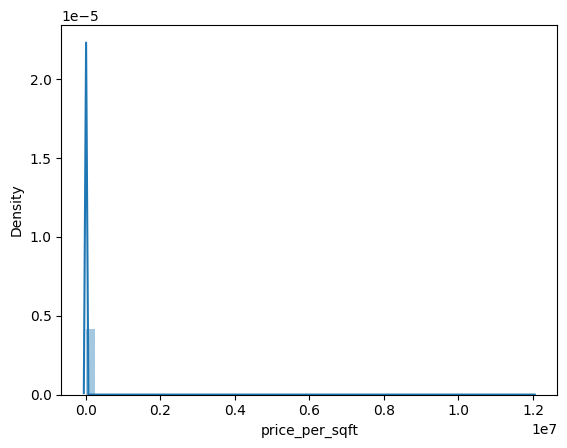

In [34]:
sns.distplot(df['price_per_sqft'])

In [35]:
#1. Trimming
new_df2=df.loc[(df['price_per_sqft']<upper_limit)&(df['price_per_sqft']>lower_limit)]
print('Before removing outliers:',len(df))
print('After removing outliers:',len(new_df2))   
print('Outliers:',len(df)-len(new_df2))

Before removing outliers: 13200
After removing outliers: 11880
Outliers: 1320


In [36]:
#2.Capping
new_df2=df.copy() #copying a new data
new_df2.loc[new_df2['price_per_sqft']>upper_limit,'price_per_sqft']=upper_limit
new_df2.loc[new_df2['price_per_sqft']<lower_limit,'price_per_sqft']=lower_limit

C:\Users\naufg\AppData\Local\Temp\ipykernel_15656\2636291615.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15312.099999999984' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df2.loc[new_df2['price_per_sqft']>upper_limit,'price_per_sqft']=upper_limit


C:\Users\naufg\AppData\Local\Temp\ipykernel_15656\3915862125.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

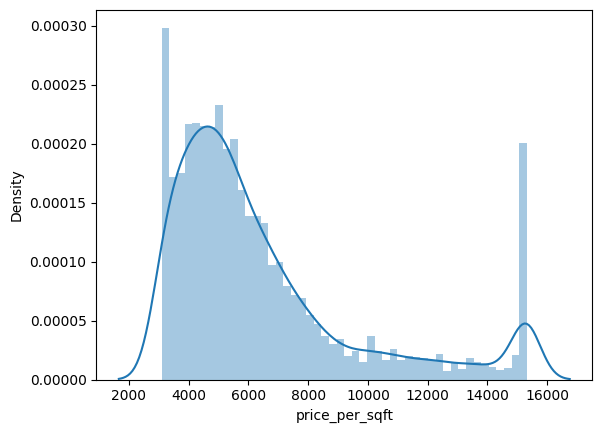

In [37]:
sns.distplot(new_df2['price_per_sqft'])

In [38]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [39]:
#finding the numerical columns
#checking the dataset and selecting the numerical columns
num_col=df.select_dtypes(include=['int', 'float']).columns
num_col

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [40]:
#compute correlation mathrix
corre_matrix=df[num_col].corr()


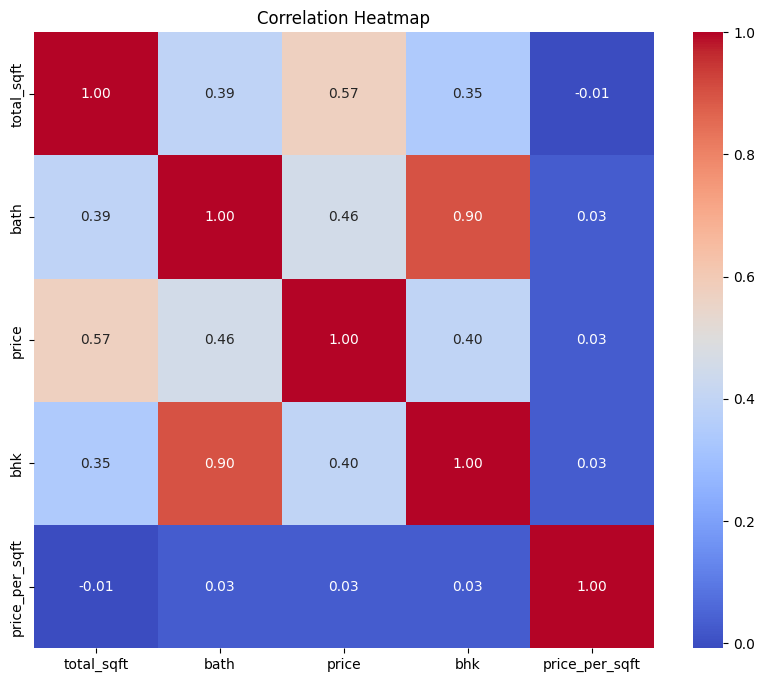

In [41]:
#plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corre_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

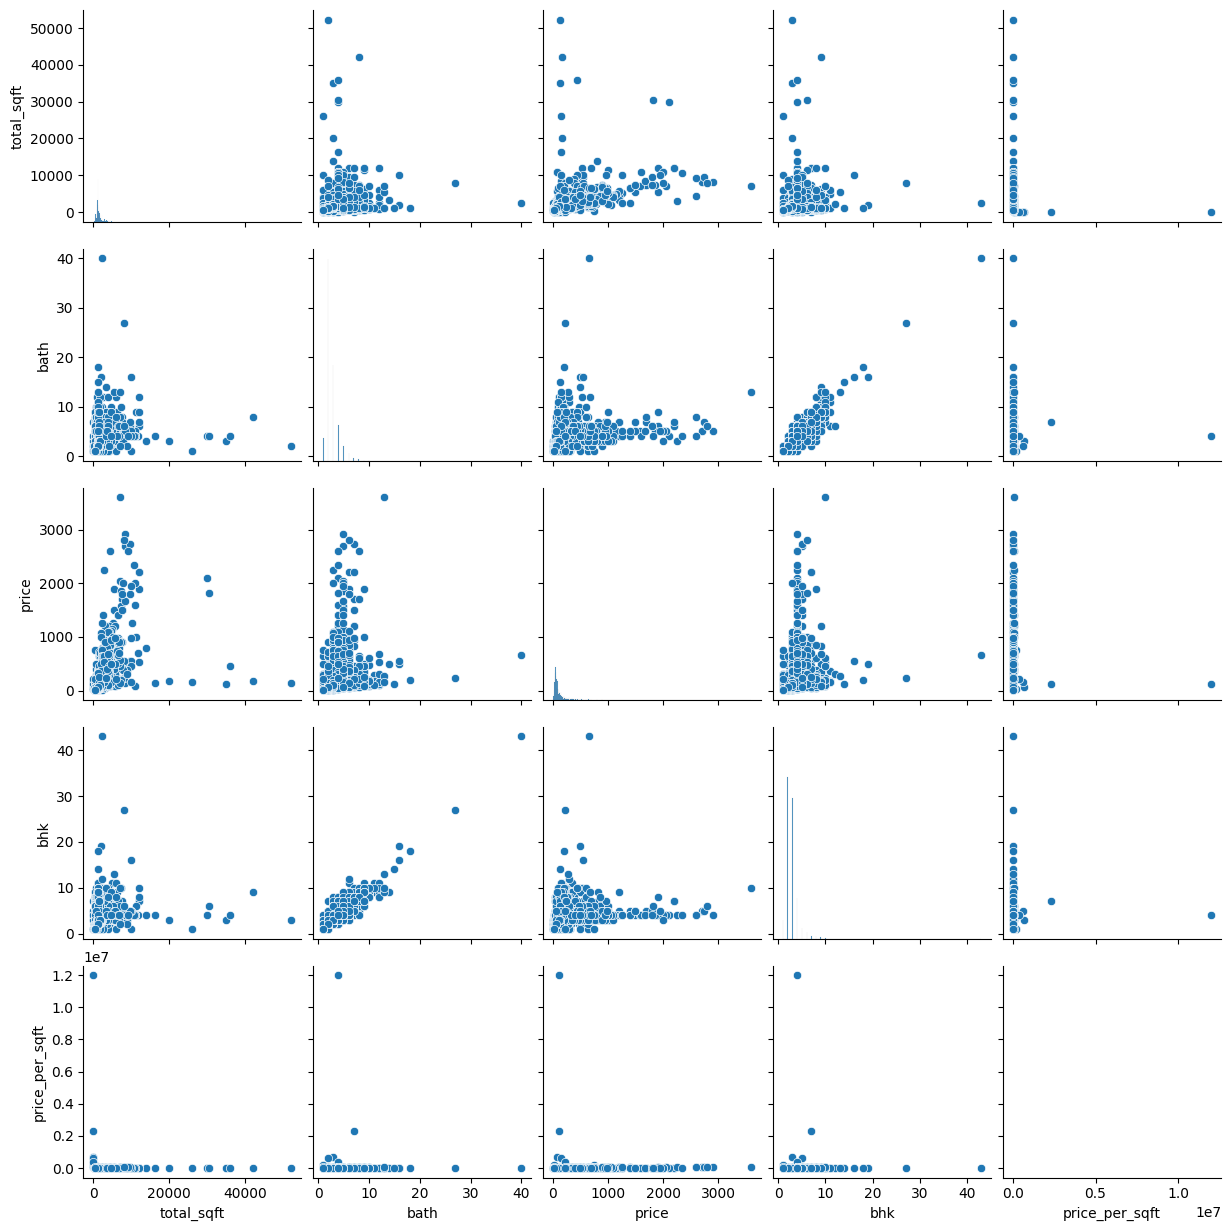

In [42]:
#plot scatterplot
sns.pairplot(df)
plt.show()